<a href="https://colab.research.google.com/github/surabhi13gupta/CDS/blob/main/Module%206/MP2/phi_2_Open_Source_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A programme by IISc and TalentSprint
### Mini-Project: Open Source Retrieval Augmented Generation (RAG)

## Problem Statement

Retrieval Q and A Integrated with LLM

## Learning Objectives

At the end of the experiment you will be able to :

1. Run Phi-2, Microsoft's small language model (SLM), using two methods:
   - Direct Inference using HuggingFace
   - Retrieval Augmented Generation (RAG) using Llama-index
2. Know the basic working of Llama Index VectorStore
3. Implement the Hugging Face embedding
4. Implement a simple FAISS-based vector store for efficient similarity search of high-dimensional data.
5. Create RetrievalQA chain along with prompt template
6. Compare the **effectiveness of Phi-2 & Zephyr-7b-beta model** by means of Cosine Similarity.
7. Compare the **effectiveness of 5 different Hugging Face embeddings** by computing and analyzing the cosine similarity between the embedded vectors of queries and results from Zephyr-7b-beta model, to understand the differences in semantic similarity and performance.


## Information

Retrieval Augmented Generation (RAG) combines the advanced text-generation capabilities of GPT and other large language models with information retrieval functions to provide precise and contextually relevant information. This innovative approach improves language models' ability to understand and process user queries by integrating the latest and most relevant data. As RAG continues to evolve, its growing applications are set to revolutionize AI efficiency and utility.

##Retrieval-Augmented Generation (RAG) Process
###  **Feeding LLMs with Accurate Information**:

- Instead of directly querying the language model, relevant data is first retrieved from a well-maintained knowledge library.


###**Retrieval Before Generation**:

- Accurate data is retrieved using vector embeddings (numerical representations of the data).
- These embeddings help match the query with relevant documents in a vector database.


###**Context for Generation**:

- Once the requested document or information is found, the retrieved context is used by the model to generate the answer.


###**Reduces Hallucinations**:

- This approach lowers the risk of hallucinations, where the model generates inaccurate or false information.


###**No Need for Retraining**:

- The knowledge base can be updated without retraining the model, making the system adaptable without incurring high costs.


###**Cost-Effective Model Updates**:

- By using a retriever system, models can be updated dynamically without the expense of a full model retraining process.

<br><br>
<center>
<img src=" https://cdn.exec.talentsprint.com/static/cds/content/RAG_Image.jpg" width= 600 px/>
</center>
<br><br>

RAG brings together four key components:

- **Embedding model**: This is where documents are turned into vectors, or numerical representations, which make it easier for the system to manage and compare large amounts of text data.
- **Retriever**: Think of this as the search engine within RAG. It uses the embedding model to process a question and fetch the most relevant document vectors that match the query.
- **Reranker (optional)**: This component takes things a step further by evaluating the retrieved documents to determine how relevant they are to the question at hand, providing a relevance score for each one.
- **Language model**: Finally, this part of the system takes the top documents provided by the retriever or reranker, along with the original question, and crafts a precise answer.
To know more about the RAG, refer [here](https://www.superannotate.com/blog/rag-explained).


In this notebook, we'll explore how to run Phi-2, Microsoft's small language model (SLM), using two methods:
- Direct Inference using HuggingFace
- Retrieval Augmented Generation (RAG) using Llama-index

Phi-2 is an SLM with 2.7 billion parameters and trained on 1.4T tokens.

## Benefits of Small Models
- Fast fine-tuning
- Can be run locally
- Requires less computational resources

### **Note: This notebook has to necessarily run on GPU.**

## Grading = 10 Points

## Install Required Packages
Install necessary libraries for running Phi-2 on Google Colab.

In [1]:
%%capture
!pip -qq install langchain torch transformers sentencepiece accelerate bitsandbytes einops sentence-transformers
!pip -qq install langchain_community
!pip -qq install langchain_huggingface
!pip -qq install huggingface_hub
!pip -qq install chromadb
!pip install hf_xet
!pip -qq install -U langchain-huggingface

## Importing necessary packages

In [15]:
import os
import numpy as np
from getpass import getpass
from langchain import hub
from langchain.llms import HuggingFacePipeline
from transformers import pipeline
from langchain_community.llms import HuggingFaceEndpoint
from langchain_community.chat_models.huggingface import ChatHuggingFace
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceHubEmbeddings
from langchain.prompts import PromptTemplate
from transformers import pipeline

from langchain.llms import HuggingFaceHub
from langchain import LLMChain
from langchain.chains import RetrievalQA
from langchain_community.embeddings import HuggingFaceEmbeddings
#from llama_index.embeddings import HuggingFaceEmbedding

from langchain_community.vectorstores import Chroma
from langchain_community.document_loaders import PyPDFLoader
from langchain.document_loaders.csv_loader import CSVLoader
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# **Phase-I:** Comparison between Microsoft Phi-2 and Hugging Face Zephyr-7b-beta without Retrieval Augmented Generation (RAG)

## 1.1 Load the Phi-2 Model and Tokenizer to integrate with Langchain using HuggingFace Pipeline

<br><br>
<center>
<img src=" https://cdn.exec.talentsprint.com/static/cds/content/Phi_2_without_RAG-1.png" width= 600 px/>
</center>
<br><br>

**Exercise-1:** Load Phi-2 model and tokenizer from Huggingface and create a pipeline for text generation. Then integrate the Phi-2 model with Langchain for better prompt handling. **(0.5 point)**

In [32]:
from transformers import AutoTokenizer, pipeline, AutoModelForCausalLM
from langchain import HuggingFacePipeline
import transformers
import torch

phi_model = 'microsoft/phi-2'
# Get model's tokenizer using AutoTokenizer.from_pretrained()

# YOUR CODE HERE
tokenizer = AutoTokenizer.from_pretrained(phi_model)

# Load the 'microsoft/phi-2' model for causal language modeling. Use AutoModelForCausalLM.from_pretrained()
# with torch_dtype='auto' and device_map='auto'

# YOUR CODE HERE

model = AutoModelForCausalLM.from_pretrained(
    phi_model,
    trust_remote_code=True,
    torch_dtype='auto',
    load_in_8bit=True,
    device_map='auto')


# Create a text-generation pipeline using the transformers library with a specific model and tokenizer,
# Adjust parameters such as device_map='auto', token limits = 256, and temperature = 0.5

# YOUR CODE HERE
pipe = pipeline(
    "text-generation", #Task is text-generated based on pre-trained model provided
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,  # Adjust max_new_tokens as needed
    do_sample=True,
    temperature=0.5,
    device_map='auto'
)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


Integrating the Phi-2 model with Langchain for better prompt handling.

In [19]:
from langchain import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from langchain.chains.llm import LLMChain

# Creating a Text-Generation Pipeline Using Hugging Face Transformers
# configure the pad token in a Hugging Face model when using a pipeline for text generation

# YOUR CODE HERE
tokenizer.pad_token = tokenizer.eos_token  # Setting pad token to EOS token
phi_llm = HuggingFacePipeline(pipeline=pipe)

# Define a prompt template
task_template = '''
You are a friendly chatbot assistant that gives structured output.
Your role is to arrange the given task in this structure.
### instruction:
{instruction}
Output:
'''

# Creating a Task Prompt Template and LLM Chain Using phi-2 Model. Store it in variable 'phi2_HFP_llm_chain'

# YOUR CODE HERE
phi_prompt = PromptTemplate(input_variables=["instruction"], template=task_template)
phi2_HFP_llm_chain = LLMChain(llm=phi_llm, prompt=phi_prompt)

<ipython-input-19-552afcd40fb4>:10: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  phi_llm = HuggingFacePipeline(pipeline=pipe)
<ipython-input-19-552afcd40fb4>:25: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  phi2_HFP_llm_chain = LLMChain(llm=phi_llm, prompt=phi_prompt)


## 1.3 Querying the Phi-2 Model
**Exercise-2:** Now let's query the model with a prompt. For example, let's ask the model to 'Give an overview of Computational Data Science PG Level certificaion course'. From the response, extract the 'text' field and save it in a variable 'phi_2_extracted_output'. **(0.5 point)**

In [33]:
# Example query
question = 'Give an overview of Computational Data Science PG Level certificaion course'

# Invoke the language model chain 'phi2_HFP_llm_chain' to generate a response to the above question and
# print the response.

# YOUR CODE HERE
response = phi2_HFP_llm_chain.invoke(question)
print("Question: ", question)
print("Response: ", response)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question:  Give an overview of Computational Data Science PG Level certificaion course
Response:  {'instruction': 'Give an overview of Computational Data Science PG Level certificaion course', 'text': '\nYou are a friendly chatbot assistant that gives structured output.\nYour role is to arrange the given task in this structure.\n### instruction:\nGive an overview of Computational Data Science PG Level certificaion course\nOutput:\nThe Computational Data Science PG Level Certification course is an overview of the field of Computational Data Science.\n'}


In [35]:
# In the above code cell, you have already got Simulated response from the model.
# The response has 2 keys ('instruction' and 'text').
# Extract the 'text' field from the response.

# YOUR CODE HERE
response_text = response.get('text')
print("Extracting text from response")
print("Question: ", question)
print(response_text)
print("==================================================================")
# Parse the text to get the output part only
# Assuming the output starts after the keyword "Output:"
# (Find the index after "Output:")

# YOUR CODE HERE
output = response_text.split('Output:')[1]
print("Output: ", output)
print("==================================================================")
# (Extract the output part and strip extra whitespace &
                   # then store it in a variable 'phi_2_extracted_output')

# YOUR CODE HERE
print("Output after stripping extra whitespace")
phi_2_extracted_output = output.strip()

# Print the extracted output variable 'phi_2_extracted_output'

# YOUR CODE HERE
print(phi_2_extracted_output)
print("==================================================================")

Extracting text from response
Question:  Give an overview of Computational Data Science PG Level certificaion course

You are a friendly chatbot assistant that gives structured output.
Your role is to arrange the given task in this structure.
### instruction:
Give an overview of Computational Data Science PG Level certificaion course
Output:
The Computational Data Science PG Level Certification course is an overview of the field of Computational Data Science.

Output:  
The Computational Data Science PG Level Certification course is an overview of the field of Computational Data Science.

Output after stripping extra whitespace
The Computational Data Science PG Level Certification course is an overview of the field of Computational Data Science.


### 1.4 Using the HuggingFace API Key

In [36]:
h_api_key =   # Your Hugging Face API Key

In [37]:
# Set your HuggingFace API key
os.environ["HUGGINGFACEHUB_API_TOKEN"] = h_api_key

## 1.5 Initializing HuggingFaceEndpoint with [**HuggingFaceH4/zephyr-7b-beta**](https://huggingface.co/HuggingFaceH4/zephyr-7b-beta) model

<br><br>
<center>
<img src=" https://cdn.exec.talentsprint.com/static/cds/content/zephyr_without_RAG-2.png" width= 600 px/>
</center>
<br><br>



In [38]:
# Initialize HuggingFaceEndpoint with your endpoint URL
endpoint_url = "https://huggingface.co/HuggingFaceH4/zephyr-7b-beta"

# Initialize the model name "HuggingFaceH4/zephyr-7b-beta" in a variable model_name
model_name = "HuggingFaceH4/zephyr-7b-beta"

## 1.6 Creating the LLM using zephyr-7b-beta

**Exercise-3:** Create an LLM using HuggingFaceEndpoint. **(0.5 point)**

In [39]:
# Import HuggingFace model abstraction class from langchain
from langchain_huggingface import HuggingFaceEndpoint

In [40]:
# Create an LLM using HuggingFaceEndpoint.
# Configure HuggingFaceEndpoint for text generation with the specified parameters such as max_new_tokens = 512,
# top_k = 30, temperature = 0.1 and repetition_penalty = 1.03. Store the created llm in
# a variable 'zephyr_7b_beta_HFE_llm'

# YOUR CODE HERE
zephyr_7b_beta_HFE_llm = HuggingFaceEndpoint(
    #endpoint_url=endpoint_url,
    repo_id = model_name,
    max_new_tokens=512,
    top_k=30,
    temperature=0.1,
    repetition_penalty=1.03
)

## 1.7 Querying the HuggingFace zephyr-7b-beta Model
Now let's query the model with a prompt. For example, let's ask the model to give an overview of the Computational Data Science PG Level certification course.

In [41]:
# Query the model with a prompt and ask the model to "Give an overview of Computational Data Science PG Level certificaion course"

zephyr_7b_beta_response = zephyr_7b_beta_HFE_llm.invoke("Give an overview of Computational Data Science PG Level certificaion course")
print(zephyr_7b_beta_response)

 offered by IIIT-Bangalore and its curriculum.

The Computational Data Science PG Level certificaion course offered by IIIT-Bangalore is a comprehensive program designed to provide students with a deep understanding of data science concepts and techniques. The course covers a wide range of topics, including machine learning, deep learning, big data analytics, and data visualization.

The curriculum of the course is divided into four modules, each focusing on a specific area of data science. The first module, "Foundations of Data Science," covers the basics of data science, including data cleaning, data wrangling, and data exploration. Students will learn how to use Python and R to manipulate and analyze data using libraries such as NumPy, Pandas, and Matplotlib.

The second module, "Machine Learning," delves into the world of machine learning algorithms, including linear regression, logistic regression, decision trees, random forests, and neural networks. Students will learn how to imp

## 1.8 Comparison: Microsoft Phi-2 and Hugging Face zephyr-7b-beta model

**Exercise-4:** Compare the RetrievalQA performance between Phi-2 and Hugging Face and zephyr-7b-beta model using Cosine Similarity. **(0.5 point)**

- **(a)** Consider the reference Question: 'Give an overview of Computational Data Science PG Level certificaion course'. Compute Cosine Similarity.

- **(b)** Consider the Benchmark_solution: 'Are you a working professional looking to build expertise in Data Science? Look no further than the PG Level Advanced Certification course in
Data Science offered by Indian Institute of Science (IISc) in association with TalentSprint. This highly sought-after programme offers a unique 5-step learning process, including LIVE online faculty-led interactive sessions, capstone projects, mentorship, case studies, and data stories. Taught by world-class faculty from a global institution and supplemented with industry learnings, this 12-month programme is best suited for professionals who want to gain practical hands-on experience in solving real-life challenges. The programme teaches participants how to build powerful models to generate actionable insights, necessary for making data-driven decisions. With an overwhelming response, this programme has enabled 750+ professionals to build Data Science expertise. Don't miss the opportunity to gain an in-depth understanding of the mechanics of working with data and identifying insights. Enroll now and take your career to the next level with the PG Level Advanced Certification course in Computational Data Science.' Compute Cosine Similarity.

In [42]:
# (a)
Q1 = "Give an overview of Computational Data Science PG Level certificaion course"
# Instantiate the Hugging Face embeddings class and embed the query 'Q1' while reshaping the result into a 2D NumPy array

# YOUR CODE HERE
embeddings = HuggingFaceEmbeddings()
query_embedding = embeddings.embed_query(Q1)
query_embedding_2d = np.array(query_embedding).reshape(1, -1)

# Embed the extracted output from phi-2 ('phi_2_extracted_output') using Hugging Face embeddings and
# reshape the result into a 2D NumPy array

# YOUR CODE HERE
phi2_embedding = embeddings.embed_query(phi_2_extracted_output)
phi2_embedding_2d = np.array(phi2_embedding).reshape(1, -1)

# Use Hugging Face embeddings to embed the response from Zephyr 7b beta ('zephyr_7b_beta_response') and
# reshape it into a 2D NumPy array

# YOUR CODE HERE
zephyr_embedding = embeddings.embed_query(zephyr_7b_beta_response)
zephyr_embedding_2d = np.array(zephyr_embedding).reshape(1, -1)

<ipython-input-42-bc9cd18bde5e>:6: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()


In [43]:
print("Length of query embedding: ", query_embedding_2d.shape)
print("Length of phi2 embedding: ", phi2_embedding_2d.shape)
print("Length of zephyr embedding: ", zephyr_embedding_2d.shape)

Length of query embedding:  (1, 768)
Length of phi2 embedding:  (1, 768)
Length of zephyr embedding:  (1, 768)


In [44]:
# Compute cosine similarity
# Calculate the cosine similarity between Q1 and 'phi_2_extracted_output'

# YOUR CODE HERE
q1_phi2_dot = cosine_similarity(query_embedding_2d, phi2_embedding_2d)
print("cosine similarity between Q1 and 'phi_2_extracted_output': ",q1_phi2_dot)

# Calculate the cosine similarity between Q1 and 'zephyr_7b_beta_response'

# YOUR CODE HERE
q1_zephyr_dot = cosine_similarity(query_embedding_2d, zephyr_embedding_2d)
print("cosine similarity between Q1 and 'zephyr_7b_beta_response': ",q1_zephyr_dot)

cosine similarity between Q1 and 'phi_2_extracted_output':  [[0.83287248]]
cosine similarity between Q1 and 'zephyr_7b_beta_response':  [[0.68580096]]


In [45]:
# (b)
Benchmark_solution = """Are you a working professional looking to build expertise in Data Science?
Look no further than the PG Level Advanced Certification course in Data Science offered by Indian Institute of Science (IISc)
in association with NSE TalentSprint. This highly sought-after programme offers a unique 5-step learning process, including
LIVE online faculty-led interactive sessions, capstone projects, mentorship, case studies, and data stories.
Taught by world-class faculty from a global institution and supplemented with industry learnings, this 12-month programme is best suited
for professionals who want to gain practical hands-on experience in solving real-life challenges. The programme teaches participants
how to build powerful models to generate actionable insights, necessary for making data-driven decisions.
With an overwhelming response, this programme has enabled 750+ professionals to build Data Science expertise.
Don't miss the opportunity to gain an in-depth understanding of the mechanics of working with data and identifying insights.
Enroll now and take your career to the next level with the PG Level Advanced Certification course in Computational Data Science."""

# Embed the Benchmark Solution (BMS) using Hugging Face embeddings and reshape it into a 2D array

# YOUR CODE HERE
benchmark_embedding = embeddings.embed_query(Benchmark_solution)
benchmark_embedding_2d = np.array(benchmark_embedding).reshape(1, -1)

# Embed the extracted output from phi-2 ('phi_2_extracted_output') using Hugging Face embeddings and
# reshape the result into a 2D NumPy array

# YOUR CODE HERE
phi2_embedding = embeddings.embed_query(phi_2_extracted_output)
phi2_embedding_2d = np.array(phi2_embedding).reshape(1, -1)

# Embed the response from Zephyr 7b beta ('zephyr_7b_beta_response') and
# reshape it into a 2D NumPy array

# YOUR CODE HERE
zephyr_embedding = embeddings.embed_query(zephyr_7b_beta_response)
zephyr_embedding_2d = np.array(zephyr_embedding).reshape(1, -1)

In [46]:
# Compute cosine similarity
# Calculate and print the cosine similarity between the Benchmark Solution (BMS) and 'phi_2_extracted_output'

# YOUR CODE HERE
benchmark_phi2_dot = cosine_similarity(benchmark_embedding_2d, phi2_embedding_2d)
print("cosine similarity between benchmark solution and 'phi_2_extracted_output': ",benchmark_phi2_dot)

# Calculate and print the cosine similarity between the Benchmark Solution (BMS) and 'zephyr_7b_beta_response'

# YOUR CODE HERE
benchmark_zephyr_dot = cosine_similarity(benchmark_embedding_2d, zephyr_embedding_2d)
print("cosine similarity between benchmark solution and 'zephyr_7b_beta_response': ",benchmark_zephyr_dot)

cosine similarity between benchmark solution and 'phi_2_extracted_output':  [[0.80010817]]
cosine similarity between benchmark solution and 'zephyr_7b_beta_response':  [[0.73556776]]


#**Phase-II:** Performing Retrieval Augmented Generation (RAG) with Microsoft Phi-2

<br><br>
<center>
<img src=" https://cdn.exec.talentsprint.com/static/cds/content/Phi_2_with_RAG-3.png" width= 1200 px/>
</center>
<br><br>

## 2.1 Retrieval Augmented Generation (RAG) with Llama-index

In this section, we'll implement RAG using Llama-index to augment the retrieval from document data.

In [37]:
!pip install -q pypdf llama-index python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.2/304.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.3/267.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 12.7 MB/s eta 0:00:00


## 2.2 Setup Llama-index
Load necessary components, read documents, and set up the RAG pipeline.

In [38]:
!pip -qq install --upgrade llama-index
!pip -qq install llama-index-embeddings-langchain
!pip -qq install llama_index.llms.ollama
!pip -qq install llama_index.embeddings.huggingface
!pip -qq install llama-index-llms-langchain
!pip install faiss-gpu-cu11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 49.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## 2.3 Importing necessary packages from Llama-index

In [1]:
from llama_index.core.indices.vector_store.base import VectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from langchain.vectorstores import FAISS
from llama_index.core import ServiceContext

In [2]:
#@title 2.4 Download Dataset
#!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/pca_d1.pdf
#!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/ens_d2.pdf
!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/demo_faqs.csv
!wget -qq https://cdn.exec.talentsprint.com/static/cds/content/docs.zip
!unzip docs.zip -d docs  # This will unzip docs.zip into a folder named 'docs'
print("Dataset downloaded successfully!!")

Archive:  docs.zip
   creating: docs/docs/
  inflating: docs/docs/DS_PG_Level.pdf  
Dataset downloaded successfully!!


## 2.5 Load Data (PDF Document)

In [3]:
# Read documents
documents = SimpleDirectoryReader('/content/docs/docs').load_data()
documents

[Document(id_='c2c84e34-3e42-4463-94e7-87921fe42324', embedding=None, metadata={'page_label': '1', 'file_name': 'DS_PG_Level.pdf', 'file_path': '/content/docs/docs/DS_PG_Level.pdf', 'file_type': 'application/pdf', 'file_size': 6281028, 'creation_date': '2025-06-06', 'last_modified_date': '2024-09-29'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='Home / Data Science / Computational Data Science\nData Science Course to Harness the Power of Data for Real-World Decision\nMaking \nPG Level Advanced Certification Programme in\nComputational Data Science  \n  \nModule starts on\n28th September\nApply Now  \n  \n1\n2\n3\nIndia’s #1\nUniversity

In [4]:
print("Number of documents: ", len(documents))

Number of documents:  15


## 2.6 Creating the Embedding Model using HuggingFaceEmbeddings **'BAAI/bge-small-en-v1.5'**

**Exercise-5:** Define an embedding model using HuggingFaceEmbeddings 'BAAI/bge-small-en-v1.5'. **(0.5 point)**

In [47]:
# Define the embedding model using HuggingFaceEmbeddings 'BAAI/bge-small-en-v1.5'
from langchain_community.embeddings import HuggingFaceEmbeddings
# YOUR CODE HERE
embed_model_1 = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')

## 2.7 Create a Vector Store using VectorStoreIndex

**Exercise-6:** Create the vector index and vector store from documents using the embedding model (used in Exercise-5). **(0.5 point)**

In [48]:
# Create the vector index from documents (as loaded under section 2.5)
# using the embedding model as achieved in Exercise-5

# YOUR CODE HERE
index = VectorStoreIndex.from_documents(documents, embed_model=embed_model_1)

In [49]:
# Create the vector store from documents (as loaded under section 2.5)
# using the embedding model (as derived in Exercise-5) and the vector index (as derived in the above code cell)

# YOUR CODE HERE
vector_store = index.storage_context.vector_store

## 2.8 Create Query Engines and Test the RAG Pipeline

**Exercise-7:** Create a Query Engine by using 'as_query_engine()' and then test the RAG pipeline for the Query: 'Give an overview of Computational Data Science PG Level certificaion course'. From the response, extract the text part and save it in a variable 'answer_text'. **(0.5 point)**

In [50]:
# Create a query engine using the vector index and the phi-2 language model in the context of document retrieval
# Use as_query_engine()

# YOUR CODE HERE
from llama_index.core import Settings
from llama_index.llms.langchain import LangChainLLM

Settings.embed_model = embed_model_1
Settings.llm = LangChainLLM(llm=phi_llm)
query_engine = index.as_query_engine()

Run a sample query to test the RAG pipeline.

In [51]:
# Test the RAG pipeline
# Query a document retrieval engine for the query 'Give an overview of Computational Data Science PG Level certificaion course' and
# print the resulting response

# YOUR CODE HERE
rag_response = query_engine.query("Give an overview of Computational Data Science PG Level certificaion course")
print(rag_response)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Context information is below.
---------------------
page_label: 6
file_path: /content/docs/docs/DS_PG_Level.pdf

Taught by world-class faculty from a global institution and supplemented with industry learnings, this 12-month programme is best suited for
professionals who want to gain practical hands-on experience in solving real-life challenges. The programme teaches participants how to build
powerful models to generate actionable insights, necessary for making data-driven decisions.
With an overwhelming response, this programme has enabled 750+ professionals to build Data Science expertise. Don't miss the opportunity to
gain an in-depth understanding of the mechanics of working with data and identifying insights. Enroll now and take your career to the next level
with the PG Level Advanced Certification course in Computational Data Science.
IISc Campus Visit

page_label: 1
file_path: /content/docs/docs/DS_PG_Level.pdf

Home / Data Science / Computational Data Science
Data Science Cours

In [52]:
# Extract the text part of the above response from a result string that contains a specified prefix, such as "Answer:"
# and display the answer text

# YOUR CODE HERE

answer_text = rag_response.response.split('Answer: ')[1]
print(answer_text)



#1 University (2016-24) & Research Institute (2021-24)
Data Science Course to Harness the Power of Data for Real-World Decision Making
PG Level Advanced Certification Programme in
Computational Data Science
  
Module starts on
28th September
Apply Now
  
1
2
3
India’s #1
University (2016-24) & Research Institute (2021-24)*
 12
Months
Executive Friendly
 2
Campus visits of
2 days each
 100%
LIVE Interactive Classes
*As per NIRF Ranking
3 Reasons Why This Data Science Courseis Unique
Learn from the Leading Faculty at IISc, India’s #1 University and Research Institute*
Designed by Faculty Members of IISc’s Department of
Computational and Data Sciences
 Taught by 5 Engineering and Management Sciences Faculty
from IISc
Curated Industry Capstones, and option to Bring Your Own
Project
 360 °  Learning on TalentSprint’s best-in-class Pracademic
 Platform
12 Month Online Live Interactive Sessions 1:1 Mentoring by Industry and Academia Experts
Demonstrate your


### 2.9 RAG Performance Evaluation using Cosine Similarity

**Exercise-8:** Measure the RAG performance using Cosine Similarity. **(0.5 point)**

- **(a)** Consider the reference Question: 'Give an overview of Computational Data Science PG Level certificaion course'. Calculate the Cosine Similarity.
- **(b)** Consider the Benchmark_solution [as considered in Exercise-4 (b)]. Calculate the Cosine Similarity.

In [53]:
# (a)
# Generate a 2D array representation of the embeddings for the query Q1 [mentioned in Exercise-4(a)]
# using the embedding model specified under Exercise-5

# YOUR CODE HERE
Q1 = "Give an overview of Computational Data Science PG Level certificaion course"
query_e = embed_model_1.embed_query(Q1) #embed_model_1 is from Exercise 5
query_e = np.array(query_e).reshape(1, -1)

# Obtain a 2D array representation of the embeddings for the extracted answer text (which was achieved in Exercise-7)
# Use the same specified embedding model mentioned in Exercise-5. Store the output in 'RAG_with_phi_2_e'

# YOUR CODE HERE
RAG_with_phi_e = embed_model_1.embed_query(answer_text)
RAG_with_phi_2_e = np.array(RAG_with_phi_e).reshape(1, -1)

In [54]:
# Calculate and print the cosine similarity between the query embedding and the RAG response embedding

# YOUR CODE HERE

cosine_query_RAG_phi = cosine_similarity(query_e, RAG_with_phi_2_e)
print("cosine similarity between Q1 and 'RAG_with_phi_2_e': ",cosine_query_RAG_phi)

cosine similarity between Q1 and 'RAG_with_phi_2_e':  [[0.77018325]]


Fill in the following blanks with the help of the above results [achieved in Exercise-4(a) and Exercise-8(a)]
- Cosine Similarity between Q1 and phi_2_extracted_output: 0.83287248
- Cosine Similarity between Q1 and zephyr_7b_beta_response: 0.68580096
- Cosine Similarity between Q1 and RAG response: 0.77018325

**So considering the reference query Q1, we can observe from the above value, that the Cosine Similarity is 77% by using RAG Architecture with Microsoft Phi-2 model.**

In [55]:
# (b)
# Embed the Benchmark solution text using the Hugging Face embeddings model and reshape it into a 2D array

# YOUR CODE HERE
Benchmark_solution = """Are you a working professional looking to build expertise in Data Science?
Look no further than the PG Level Advanced Certification course in Data Science offered by Indian Institute of Science (IISc)
in association with NSE TalentSprint. This highly sought-after programme offers a unique 5-step learning process, including
LIVE online faculty-led interactive sessions, capstone projects, mentorship, case studies, and data stories.
Taught by world-class faculty from a global institution and supplemented with industry learnings, this 12-month programme is best suited
for professionals who want to gain practical hands-on experience in solving real-life challenges. The programme teaches participants
how to build powerful models to generate actionable insights, necessary for making data-driven decisions.
With an overwhelming response, this programme has enabled 750+ professionals to build Data Science expertise.
Don't miss the opportunity to gain an in-depth understanding of the mechanics of working with data and identifying insights.
Enroll now and take your career to the next level with the PG Level Advanced Certification course in Computational Data Science."""

benchmark_embedding = embed_model_1.embed_query(Benchmark_solution)

# Generate a 2D array representation of the embedded response by using Hugging Face embeddings (specified under Exercise-5)

# YOUR CODE HERE
benchmark_embedding_2d = np.array(benchmark_embedding).reshape(1, -1)

In [56]:
# Calculate the cosine similarity between the benchmark solution embeddings and the RAG response embeddings
# to evaluate their similarity. Print the Cosine Similarity value.

# YOUR CODE HERE
cosine_benchmark_RAG_phi = cosine_similarity(benchmark_embedding_2d, RAG_with_phi_2_e)
print("cosine similarity between benchmark_embedding_2d and 'RAG_with_phi_2_e': ",cosine_benchmark_RAG_phi)


cosine similarity between benchmark_embedding_2d and 'RAG_with_phi_2_e':  [[0.88790763]]


Fill in the following blank with the help of the above results [achieved in Exercise-8(b)]

**So considering the Benchmark_solution BMS, we can observe from the above value, that the Cosine Similarity is 88% by using RAG Architecture with Microsoft Phi-2 model.**

# **Phase-III:** Performing RAG using HuggingFace Retrieval Chain For 5 different Embedding models and FAISS Vector Store

We will use CSV Dataset for this phase.

<br><br>
<center>
<img src=" https://cdn.exec.talentsprint.com/static/cds/content/varying_embeddings-4.png" height = 600 width= 1600 px/>
</center>
<br><br>

## 3.1 Load Data (CSV Dataset)

In [57]:
loader = CSVLoader(file_path='/content/demo_faqs.csv', source_column="prompt",encoding='latin-1')

# Store the loaded data in the 'data' variable
data = loader.load()
documents_csv = data

In [59]:
len(documents_csv)

75

## 3.2 Using 5 different HuggungFace Embedding Models

In [60]:
# Define embedding model-1
embed_model_1 = HuggingFaceEmbeddings(model_name='BAAI/bge-small-en-v1.5')

# Define embedding model-2
embed_model_2 = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

# Define embedding model-3
embed_model_3 = HuggingFaceEmbeddings(model_name='sentence-transformers/paraphrase-MiniLM-L12-v2')

# Define embedding model-4
embed_model_4 = HuggingFaceEmbeddings(model_name='sentence-transformers/all-distilroberta-v1')

# Define embedding model-5
embed_model_5 = HuggingFaceEmbeddings(model_name='sentence-transformers/multi-qa-MiniLM-L6-cos-v1')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## 3.3 Vector store using FAISS

Facebook AI Similarity Search (FAISS) is a library for efficient similarity search and clustering of dense vectors. It contains algorithms that search in sets of vectors of any size, up to ones that possibly do not fit in RAM. It also contains supporting code for evaluation and parameter tuning.
For further details, please refer to the [link](https://faiss.ai/)

How to use functionality related to the FAISS vector database?

In the following code cell, we will show functionality specific to this integration. After going through, it may be useful to explore relevant to learn how to use this vectorstore as part of a larger chain.

**Exercise-9:** Create a FAISS vector database using Hugging Face Embeddings model 'BAAI/bge-small-en-v1.5'. Then retrieve relevant answers for a query. Use 'get_relevant_documents()'. **(0.5 point)**

In [62]:
len(data), len(documents_csv)

(75, 75)

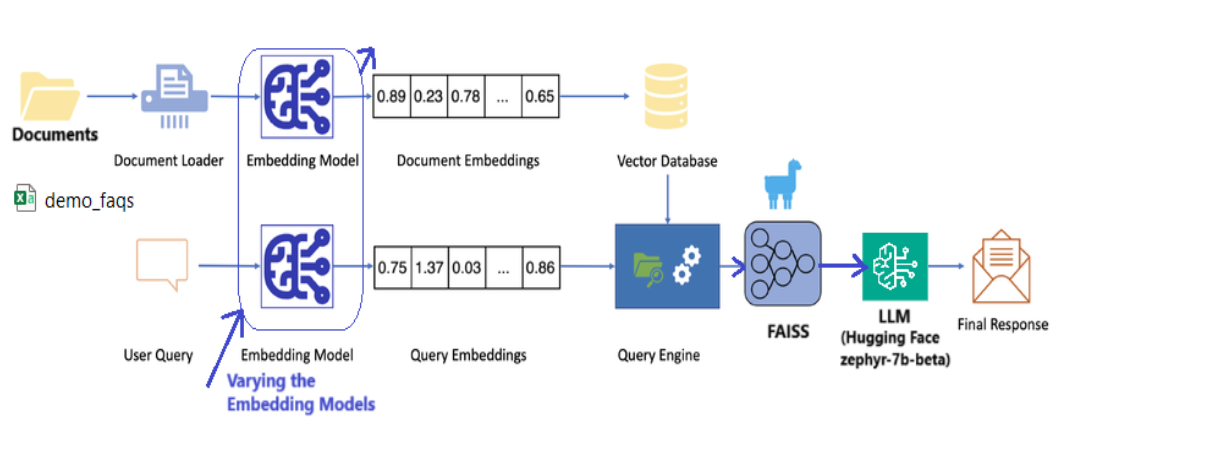

In [63]:
# Create a FAISS vector database from 'data' (loaded under section 3.1)
# using the specified embedding model 'BAAI/bge-small-en-v1.5'

# YOUR CODE HERE
vector_store = FAISS.from_documents(documents_csv, embed_model_1)

# Create a retriever for querying the vector database with a specified score threshold = 0.7 to filter relevant results
# Store it in a variable 'h_retriever_1'

# YOUR CODE HERE

# Step 3: Create a retriever
h_retriever_1 = vector_store.as_retriever(search_kwargs={'score_threshold': 0.7})

In the above code cell, The provided code snippet sets up a FAISS (Facebook AI Similarity Search) vector database to store document embeddings and enables querying this database using a retriever with a specific score threshold.

- **FAISS.from_documents(...)**: This method initializes a FAISS vector database using a list of documents and a pre-defined embedding model.
- **h_vectordb.as_retriever(...)**: This method converts the FAISS vector database into a retriever object that can be queried using natural language or embedded queries.

In [68]:
# Retrieve relevant documents from the vector database (achieved in Exercise-9)
# based on a specific query, such as "How about job placement support?"

# YOUR CODE HERE
query = "How about job placement support?"
retrieved_docs = h_retriever_1.get_relevant_documents(query, k=3)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)


prompt: Do you provide any job assistance?
response: Yes, We help you with resume and interview preparation along with that we help you in building online credibility, and based on requirements we refer candidates to potential recruiters.
prompt: Can I add this course to my resume?
response: Yes. Absolutely you can mention the AtliQ Hardware project experience in your resume with the relevant skills that you will learn from this course
prompt: Will this course guarantee me a job?
response: We created a much lighter version of this course on YouTube available for free (click this link) and many people gave us feedback that they were able to fetch jobs (see testimonials). Now this paid course is at least 5x better than the YouTube course which gives us ample confidence that you will be able to get a job. However, we want to be honest and do not want to make any impractical promises! Our guarantee is to prepare you for the job market by teaching the most relevant skills, knowledge & timel

In the above code cell,

- **h_retriever.get_relevant_documents(...)**: This method queries the retriever (which is linked to the FAISS vector database) with a given text query.

As you can see above, the retriever that was created using FAISS and Hugging Face Embedding is now capable of pulling relavant documents from the original CSV file knowledge store. This is very powerful and it will help us further in this project.

**Exercise-10:** Create a FAISS vector database using Embeddings model 'sentence-transformers/all-MiniLM-L6-v2'. Then retrieve relevant answers for a query. Use 'get_relevant_documents()'. **(0.5 point)**

In [84]:
# Create a FAISS vector database from 'data' using the specified embedding model 'sentence-transformers/all-MiniLM-L6-v2'

# YOUR CODE HERE
vector_store_2 = FAISS.from_documents(documents_csv, embed_model_2)

# Create a retriever for querying the vector database with a specified score threshold = 0.7
# Store it in a variable 'h_retriever_2'

# YOUR CODE HERE
h_retriever_2 = vector_store_2.as_retriever(search_kwargs={'score_threshold': 0.7})

In [85]:
# Retrieve relevant documents from the vector database (achieved in Exercise-10)
# based on a specific query "How about job placement support?"

# YOUR CODE HERE
query = "How about job placement support?"
retrieved_docs = h_retriever_2.get_relevant_documents(query, k=3)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)

In [ ]:
def normalize_embeddings(embeddings):
    return embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Extract the page_content from each Document object
# YOUR CODE HERE
document_texts = [doc.page_content for doc in documents_csv]

# Now embed the extracted texts
raw_embeddings = np.array([embed_model_2.embed_query(text) for text in document_texts])

normalized_embeddings = normalize_embeddings(raw_embeddings)
# Note: When using FAISS.from_embeddings, the documents list should correspond to the embedded texts
vector_store_2_1 = FAISS.from_embeddings(normalized_embeddings, documents_csv)


h_retriever_2_1 = vector_store_2_1.as_retriever(search_kwargs={'score_threshold': 0.7})
query = "How about job placement support?"
retrieved_docs = h_retriever_2_1.get_relevant_documents(query, k=3)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)

In [96]:
def normalize_embeddings(embeddings):
    # Handle the case where the norm is zero to avoid division by zero
    norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
    # Replace zeros in norms with a small value or 1 where embeddings are zero
    # This prevents division by zero errors while maintaining the correct behavior for zero vectors
    norms[norms == 0] = 1e-10 # Use a small epsilon to avoid exactly zero
    return embeddings / norms

document_texts = [doc.page_content for doc in documents_csv]
raw_embeddings = np.array([embed_model_2.embed_query(text) for text in document_texts])

normalized_embeddings = normalize_embeddings(raw_embeddings)
text_embedding_pairs = list(zip(document_texts, normalized_embeddings))
vector_store_2_1 = FAISS.from_embeddings(text_embedding_pairs, embed_model_2)

h_retriever_2_1 = vector_store_2_1.as_retriever(search_kwargs={'score_threshold': 0.5})
query = "How about job placement support?"
retrieved_docs = h_retriever_2_1.get_relevant_documents(query, k=3)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)

**Exercise-11:** Create a FAISS vector database using Embeddings model 'sentence-transformers/paraphrase-MiniLM-L12-v2'. Then retrieve relevant answers for a query. Use 'get_relevant_documents()'. **(0.5 point)**

In [70]:
# Create a FAISS vector database from 'data' using the specified embedding model 'sentence-transformers/paraphrase-MiniLM-L12-v2'

# YOUR CODE HERE
vector_store_3 = FAISS.from_documents(documents_csv, embed_model_3)

# Create a retriever for querying the vector database with a specified score threshold = 0.7
# Store it in a variable 'h_retriever_3'

# YOUR CODE HERE
h_retriever_3 = vector_store_3.as_retriever(search_kwargs={'score_threshold': 0.7})

In [73]:
# Retrieve relevant documents from the vector database (achieved in Exercise-11)
# based on the specific query "How about job placement support?"

# YOUR CODE HERE
query = "How about job placement support?"
retrieved_docs = h_retriever_3.get_relevant_documents(query, k=5)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)

**Exercise-12:** Create a FAISS vector database using Embeddings model 'sentence-transformers/all-distilroberta-v1'. Then retrieve relevant answers for a query. Use 'get_relevant_documents()'. **(0.5 point)**

In [74]:
embed_model_4

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-distilroberta-v1', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [75]:
# Create a FAISS vector database from 'data' using the specified embedding model 'sentence-transformers/all-distilroberta-v1'

# YOUR CODE HERE
vector_store_4 = FAISS.from_documents(documents_csv, embed_model_4)

# Create a retriever for querying the vector database based on a specific score threshold = 0.7
# Store it in a variable 'h_retriever_4'

# YOUR CODE HERE
h_retriever_4 = vector_store_4.as_retriever(search_kwargs={'score_threshold': 0.7})

In [77]:
# Retrieve relevant documents from the vector database (achieved in Exercise-12)
# based on the specific query "How about job placement support?"

# YOUR CODE HERE
query = "How about job placement support?"
retrieved_docs = h_retriever_4.get_relevant_documents(query, k=5)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)

**Exercise-13:** Create a FAISS vector database using Embeddings model 'sentence-transformers/multi-qa-MiniLM-L6-cos-v1'. Then retrieve relevant answers for a query. Use 'get_relevant_documents()'. **(0.5 point)**

In [78]:
# Create a FAISS vector database from 'data' using a specified embedding model 'sentence-transformers/multi-qa-MiniLM-L6-cos-v1'

# YOUR CODE HERE
vector_store_5 = FAISS.from_documents(documents_csv, embed_model_5)

# Create a retriever for querying the vector database based on a specific score threshold = 0.7
# Store it in a variable 'h_retriever_5'

# YOUR CODE HERE
h_retriever_5 = vector_store_5.as_retriever(search_kwargs={'score_threshold': 0.7})

In [79]:
# Retrieve relevant documents from the vector database (achieved in Exercise-13)
# based on the specific query "How about job placement support?"

# YOUR CODE HERE
query = "How about job placement support?"
retrieved_docs = h_retriever_5.get_relevant_documents(query, k=5)

# Display results
for doc in retrieved_docs:
    print(doc.page_content)

In [80]:
documents_csv[0]

Document(metadata={'source': 'I have never done programming in my life. Can I take this bootcamp?', 'row': 0}, page_content='prompt: I have never done programming in my life. Can I take this bootcamp?\nresponse: Yes, this is the perfect bootcamp for anyone who has never done coding and wants to build a career in the IT/Data Analytics industry or just wants to perform better in your current job or business using data.')

In [ ]:
# prompt: why no results using h_retriever_2

Based on the provided code and comments, the most likely reason for `h_retriever_2` yielding no results is the **score threshold** (`search_kwargs={'score_threshold': 0.7}`).

Here's why:

1.  **Embedding Model Differences:** Each retriever (`h_retriever_1`, `h_retriever_2`, `h_retriever_3`, etc.) uses a different embedding model. These models will produce different vector representations for the same text.
2.  **Similarity Scores:** The `score_threshold` filters out documents whose similarity score with the query embedding is below the specified value. This similarity score is calculated based on the embeddings generated by the specific model used for that retriever.
3.  **Threshold Impact:** It's possible that the `sentence-transformers/all-MiniLM-L6-v2` model (used for `h_retriever_2`), when calculating the similarity between the query "How about job placement support?" and the documents in `documents_csv`, results in scores that are all below the `0.7` threshold. This would cause `get_relevant_documents` to return an empty list.

To verify this, you could try:

*   **Lowering the threshold:** Reduce the `score_threshold` for `h_retriever_2` (e.g., to 0.6 or 0.5) and see if you get results.
*   **Checking raw scores:** Inspect the similarity scores directly without the threshold to see what values are being generated by that specific embedding model for the query and documents.

The code itself for creating `h_retriever_2` and performing the retrieval seems correct based on the pattern used for the other retrievers. The issue is most likely the interaction between the specific embedding model and the chosen similarity threshold.

## 3.4 Create RetrievalQA chain with FAISS Vectore Store & Hugging Face 🚀

**Exercise-14:** Create RetrievalQA chains for 5 different HuggungFace Embedding Models. Use llm model zephyr_7b_beta and use PromptTemplate to get PROMPT. Then use 'RetrievalQA.from_chain_type()' for getting the 5 Hugging Face RetrievalQA chains. **(0.5 point)**

In [ ]:
prompt_template = """Given the following context and a question, generate an answer based on this context only.
In the answer try to provide as much text as possible from "response" section in the source document context without making much changes.
If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer.

CONTEXT: {context}

QUESTION: {question}"""


PROMPT = PromptTemplate(input_variables=["context", "question"], template=prompt_template)
chain_type_kwargs = {"prompt": PROMPT}

# create a RetrievalQA chain in LangChain using the 'zephyr_7b_beta_HFE_llm' language model (derived in Exercise-3),
# specifying the chain_type as "stuff",
# integrating the 'h_retriever_1' (refer Exercise-9), and
# ensuring that the source documents are returned alongside the answers to the user's queries.

# YOUR CODE HERE

# create a RetrievalQA chain in LangChain using the 'zephyr_7b_beta_HFE_llm' language model (derived in Exercise-3),
# specifying the chain_type as "stuff",
# integrating the 'h_retriever_2' (refer Exercise-10), and
# ensuring that the source documents are returned alongside the answers to the user's queries.

# YOUR CODE HERE

# create a RetrievalQA chain in LangChain using the 'zephyr_7b_beta_HFE_llm' language model (derived in Exercise-3),
# specifying the chain_type as "stuff",
# integrating the 'h_retriever_3' (refer Exercise-11), and
# ensuring that the source documents are returned alongside the answers to the user's queries.

# YOUR CODE HERE

# create a RetrievalQA chain in LangChain using the 'zephyr_7b_beta_HFE_llm' language model (derived in Exercise-3),
# specifying the chain_type as "stuff",
# integrating the 'h_retriever_4' (refer Exercise-12), and
# ensuring that the source documents are returned alongside the answers to the user's queries.

# YOUR CODE HERE

# create a RetrievalQA chain in LangChain using the 'zephyr_7b_beta_HFE_llm' language model (derived in Exercise-3),
# specifying the chain_type as "stuff",
# integrating the 'h_retriever_5' (refer Exercise-13), and
# ensuring that the source documents are returned alongside the answers to the user's queries.

# YOUR CODE HERE

In the above code cell,  The code snippet sets up a RetrievalQA chain using a custom prompt template with a Hugging Face language model and a retriever.

- **PromptTemplate(...)**: Initializes a PromptTemplate object from the langchain.prompts module.
- **template=prompt_template**: Specifies the template string created above.
- **input_variables=["context", "question"]**: Defines the placeholders in the template that will be replaced by actual context and question values during the query.
- **chain_type_kwargs**: This dictionary contains the prompt key with the PROMPT object, which will be used to format the queries sent to the language model.
- **RetrievalQA.from_chain_type(...)**: Initializes a RetrievalQA chain.
- **llm=h_llm**: Specifies the language model (h_llm) to be used for generating answers.
- **chain_type="stuff"**: Defines the type of chain. In this case, "stuff" is a placeholder that can be replaced with other chain types depending on the use case.
- **retriever=h_retriever**: Provides the retriever (h_retriever) that will be used to fetch relevant context from the vector database.
- **input_key="query"**: Indicates the key used to pass the query to the chain.
return_source_documents=True: Ensures that the source documents used to generate the answer are returned along with the answer.
- **chain_type_kwargs=chain_type_kwargs**: Passes additional keyword arguments (including the prompt template) to the chain.

## 3.5 Let's ask some questions to FAISS based Hugging Face RetrievalQA chain

**Exercise-15:** Execute a retrieval-based QA query for the question: 'Do you provide job assistance and also do you provide job guarantee?' using each of the 5 ReyrievalQA chains as achieved in Exercise-14. **(0.5 point)**

In [ ]:
Q1 = 'Do you provide job assistance and also do you provide job gurantee?'

# Invoke the RetrievalQA chain 'h_retriever_1' (refer Exercise-9) with the specific query Q1 to retrieve the corresponding answer and any relevant documents
# The output will be a dictionary. Consider it as 'h_retrieval_QA1'

# YOUR CODE HERE

# Get the list of keys in the dictionary 'h_retrieval_QA1'

# YOUR CODE HERE

# Access the value using the key's index and store the value in 'h_result_value1'

# YOUR CODE HERE  (use 1 as the index of 'result' key)
######################################################
# Invoke the RetrievalQA chain 'h_retriever_2' (refer Exercise-10) with the specific query Q1 to retrieve the corresponding answer and any relevant documents
# The output will be a dictionary. Consider it as 'h_retrieval_QA2'

# YOUR CODE HERE

# Get the list of keys in the dictionary 'h_retrieval_QA2'

# YOUR CODE HERE

# Access the value using the key's index and store the value in 'h_result_value2'

# YOUR CODE HERE  (use 1 as the index of 'result' key)
######################################################
# Invoke the RetrievalQA chain 'h_retriever_3' (refer Exercise-11) with the specific query Q1 to retrieve the corresponding answer and any relevant documents
# The output will be a dictionary. Consider it as 'h_retrieval_QA3'

# YOUR CODE HERE

# Get the list of keys in the dictionary 'h_retrieval_QA3'

# YOUR CODE HERE

# Access the value using the key's index and store the value in 'h_result_value3'

# YOUR CODE HERE  (use 1 as the index of 'result' key)
######################################################
# Invoke the RetrievalQA chain 'h_retriever_4' (refer Exercise-12) with the specific query Q1 to retrieve the corresponding answer and any relevant documents
# The output will be a dictionary. Consider it as 'h_retrieval_QA4'

# YOUR CODE HERE

# Get the list of keys in the dictionary 'h_retrieval_QA4'

# YOUR CODE HERE

# Access the value using the key's index and store the value in 'h_result_value4'

# YOUR CODE HERE  (use 1 as the index of 'result' key)
######################################################
# Invoke the RetrievalQA chain 'h_retriever_5' (refer Exercise-13) with the specific query Q1 to retrieve the corresponding answer and any relevant documents
# The output will be a dictionary. Consider it as 'h_retrieval_QA5'

# YOUR CODE HERE

# Get the list of keys in the dictionary 'h_retrieval_QA5'

# YOUR CODE HERE

# Access the value using the key's index and store the value in 'h_result_value5'

# YOUR CODE HERE  (use 1 as the index of 'result' key)

**Fromthe above results, you will be able to see, that the answer of question comes from two different FAQs within the Codebasics FAQ csv file and it is able to pull those questions and merge them nicely.**

## 3.6 Comparison: 5 different embedding models performance (for FAISS Vectore Store)

**Exercise-16:** Compare the RetrievalQA performance among all 5 different Embedding Models using Cosine Similarity.

Use the embeddig models achieved under section 3.2. **(0.5 point)**

- **(a)** Consider the reference Question: 'Do you provide job assistance and also do you provide job guarantee?'. Compute Cosine Similarity.

- **(b)** Consider the Benchmark_response: 'Yes, We help you with resume and interview preparation along with that we help you in building online credibility, and based on requirements we refer candidates to potential recruiters.' Compute Cosine Similarity.

In [ ]:
# Refer to the 5 different HuggungFace Embedding Models as already created under section 3.2
# Put those 5 embed models as below.
h_embeddings1 = embed_model_1
h_embeddings2 = embed_model_2
h_embeddings3 = embed_model_3
h_embeddings4 = embed_model_4
h_embeddings5 = embed_model_5

Benchmark_response = """Yes, We help you with resume and interview preparation along with that we help you in building online credibility,
and based on requirements we refer candidates to potential recruiters."""

BMR = Benchmark_response

# Reshape the output of embedding the query (Q1 as given in Exercose-15) using the 1st embedding model (h_embeddings1) into a 2D array.
# YOUR CODE HERE
# Convert the output of embedding the BMR (mentioned above) using the 1st embedding model (h_embeddings1) into a 2D array.
# YOUR CODE HERE
# Reshape the output of embedding the h_result_value1 (which was created in Exercise-15) into a 2D array using h_embeddings1.
# YOUR CODE HERE

# Reshape the output of embedding the query (Q1 as given in Exercose-15) using the 2nd embedding model (h_embeddings2) into a 2D array.
# YOUR CODE HERE
# Convert the output of embedding the BMR (mentioned above) using the 2nd embedding model (h_embeddings2) into a 2D array.
# YOUR CODE HERE
# Reshape the output of embedding the h_result_value2 (which was created in Exercise-15) into a 2D array using h_embeddings2.
# YOUR CODE HERE

# Reshape the output of embedding the query (Q1 as given in Exercose-15) using the 3rd embedding model (h_embeddings3) into a 2D array.
# YOUR CODE HERE
# Convert the output of embedding the BMR (mentioned above) using the 3rd embedding model (h_embeddings3) into a 2D array.
# YOUR CODE HERE
# Reshape the output of embedding the h_result_value3 (which was created in Exercise-15) into a 2D array using h_embeddings3.
# YOUR CODE HERE

# Reshape the output of embedding the query (Q1 as given in Exercose-15) using the 4th embedding model (h_embeddings4) into a 2D array.
# YOUR CODE HERE
# Convert the output of embedding the BMR (mentioned above) using the 4th embedding model (h_embeddings4) into a 2D array.
# YOUR CODE HERE
# Reshape the output of embedding the h_result_value4 (which was created in Exercise-15) into a 2D array using h_embeddings4.
# YOUR CODE HERE

# Reshape the output of embedding the query (Q1 as given in Exercose-15) using the 5th embedding model (h_embeddings5) into a 2D array.
# YOUR CODE HERE
# Convert the output of embedding the BMR (mentioned above) using the 4th embedding model (h_embeddings5) into a 2D array.
# YOUR CODE HERE
# Reshape the output of embedding the h_result_value5 (which was created in Exercise-15) into a 2D array using h_embeddings5.
# YOUR CODE HERE

In [ ]:
# (a)
# Calculate and display the cosine similarity between
# (i) Q1 (as given in Exercose-15) and h_result_value1, (ii) Q1 (as given in Exercose-15) and h_result_value2,
# (iii) Q1 (as given in Exercose-15) and h_result_value3, (iv) Q1 (as given in Exercose-15) and h_result_value4, and
# (v) Q1 (as given in Exercose-15) and h_result_value5

# YOUR CODE HERE

Fill in the following blanks.

**So, by considering the reference query Q1(as given in Exercose-15), as we can observe from the above result, that the highest Cosine Similarity (______%) is achieved by using the HuggingFace embedding model '_______________________'.**

**So after the below code cell, use the corresponding RetrievalQA chain (i.e., ________) which is the best out of 5 RetrievalQA chains) to ask following queries and to get responses.**

In [ ]:
# (b)
# Compute and print the cosine similarity between the benchmark reference embedding (BMR) and
# multiple result embeddings, indicating their similarity scores

# YOUR CODE HERE

Fill in the following blanks.

**So, by considering the Benchmark_response BMR (mentioned in Exercise-16), as we can observe from the above result, that the highest Cosine Similarity (______%) is achieved by using the embedding model ___________________________.**

In [ ]:
# Ask Question "Do you guys provide internship and also do you offer EMI payments?""
# YOUR CODE HERE

In [ ]:
# Ask Question "do you have javascript course?"
# YOUR CODE HERE

In [ ]:
# Ask Question "Do you have plans to launch blockchain course in future?"
# YOUR CODE HERE

In [ ]:
# Ask Question "should I learn power bi or tableau?"
# YOUR CODE HERE

In [ ]:
# Ask Question "I've a MAC computer. Can I use powerbi on it?"
# YOUR CODE HERE

In [ ]:
# Ask Question "I don't see power pivot. how can I enable it?"
# YOUR CODE HERE

In [ ]:
# Ask Question "What is the price of your machine learning course?"
# YOUR CODE HERE

# **Phase-IV:** Performing RAG using HuggingFace Retrieval Chain For Fixed Embedding model and Chromadb Vector Store

In this Phase-IV, the vector store is changed from FAISS to Chromadb

<br><br>
<center>
<img src=" https://cdn.exec.talentsprint.com/static/cds/content/varying_vector_stores-5.png" height = 600 width= 1600 px/>
</center>
<br><br>

## 4.1 Vector store using Chromadb

##### For vector database we can use chromadb as shown below. During the experimentation, we found Hugging Face Embeddings and FAISS to be appropriate for our use case. Let's see the retrieval performance using Chromadb in the following code cell.

**Exercise-17:** Create a Chroma vector database. Use the above achieved best Hugging Face Embeddings model 'BAAI/bge-small-en-v1.5'. Then retrieve relevant answers for a query. Use 'get_relevant_documents()' **(0.5 point)**

In [ ]:
# Create a Chroma vector database from documents using embed_model_1 that was created under section 3.2 and
# persist it to a specified directory

# YOUR CODE HERE

In [ ]:
# Create a retriever for querying the vector database derived through Chroma with a score_threshold = 0.7

# YOUR CODE HERE

In [ ]:
 # Retrieve relevant documents related to the query "how about job placement support?"

 # YOUR CODE HERE

In the above code cell,

- **Chroma.from_documents(...)**: This method initializes a Chroma vector database using a list of documents, an embedding model, and a directory to persist the database.
- **g_vectordb.as_retriever(...)**: This method converts the Chroma vector database instance (g_vectordb) into a retriever object that can be used to perform queries.
- **g_retriever.get_relevant_documents(...)**: This method queries the retriever object (g_retriever) with the given text query.

## 4.2 Create RetrievalQA chain with Chromadb Vectore Store & Hugging Face 🚀

**Exercise-18:** Now we will use the achieved best embedding model as evaluated in Exercise-16 (i.e., HuggingFace embedding model 'BAAI/bge-small-en-v1.5') to see if there is any impact in RetrievalQA chain's performance if the Vector Store is changed from FAISS to Chromadb. Create RetrievalQA chain with Chromadb Vectore Store. Use PromptTemplate to get PROMPT. Then use 'RetrievalQA.from_chain_type()' for getting the Chromadb Vectore Store based RetrievalQA chain. **(0.5 point)**

In [ ]:
prompt_template = """Given the following context and a question, generate an answer based on this context only.
In the answer try to provide as much text as possible from "response" section in the source document context without making much changes.
If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer.

CONTEXT: {context}

QUESTION: {question}"""


PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)
chain_type_kwargs = {"prompt": PROMPT}

# Create a RetrievalQA chain using the 'zephyr_7b_beta_HFE_llm' model (derived in Exercise-3) and
# the retriever created in Exercise-17, while returning source documents and customizing chain type arguments

# YOUR CODE HERE

In the above code cell, The code snippet sets up a RetrievalQA chain using a custom prompt template with a Google PaLM language model and a retriever.

- **PromptTemplate(...)**: Initializes a PromptTemplate object from the langchain.prompts module.
- **template=prompt_template**: Specifies the template string that defines how queries should be formatted.
- **input_variables=["context", "question"]**: Lists the placeholders in the template that will be replaced by actual values for context and question.
chain_type_kwargs: A dictionary that includes the prompt template used to format the queries.
- **RetrievalQA.from_chain_type(...)**: Initializes a RetrievalQA chain.
- **llm=g_llm**: Specifies the Google PaLM language model (g_llm) used for generating answers.
- **chain_type="stuff"**: Defines the type of chain. "stuff" can be replaced with other chain types as needed.
- **retriever=g_retriever**: The retriever (g_retriever) used to fetch relevant documents from the vector database.
- **input_key="query"**: Indicates the key used for passing the query to the chain.
- **return_source_documents=True**: Ensures that the documents used to generate the answer are returned along with the answer.
- **chain_type_kwargs=chain_type_kwargs**: Passes additional keyword arguments, including the prompt template, to the chain.

## 4.3 Let's ask some questions to Chromadb based HuggingFace retrieval QA chain

**Exercise-19:** By using the Chromadb Vector Store based Retrieval QA chain (achieved in Exercise-18), execute a retrieval-based QA query for the question: 'Do you provide job assistance and also do you provide job guarantee?'. **(0.5 point)**

In [ ]:
Q1 = 'Do you provide job assistance and also do you provide job gurantee?'
# Using the Chromadb Vector Store based Retrieval QA chain (achieved in Exercise-18),
# execute a retrieval-based QA query for the question Q1 (mentioned above). The output will be a dictionary.
# Name it as 'g_retrieval_QA1'

# YOUR CODE HERE

# Get the list of keys in the dictionary 'g_retrieval_QA1'

# YOUR CODE HERE

# Access the value using the key's index. Store the value in a variable 'g_result_value1'
# YOUR CODE HERE  (Use 1 as the index of 'result' key)

## 4.4 Comparison: Is there any impact?
- keeping the llm and embedding model unchanged but only changing the Vector Store from FAISS to Chromadb

**Exercise-20:** Using Cosine Similarity, measure the RetrievalQA performance of the Chromadb based RetrievalQA chain as achieved in Exercise-18. Use the best embeddig model as evaluated in Exercise-16 (i.e., HuggingFace embedding model 'BAAI/bge-small-en-v1.5').

Consider the reference Question: 'Do you provide job assistance and also do you provide job guarantee?'. **(0.5 point)**

In [ ]:
# Using HuggingFaceEmbeddings 'BAAI/bge-small-en-v1.5'
embeddings = embed_model_1

# Convert a query into an embedding array using the embed_query() function and reshape it to a 2D array for Q1

# YOUR CODE HERE

# Convert 'g_result_value1' created in Exercise-19 into an embedding array using the embed_query() function and
# reshape it to a 2D array

# YOUR COE# HERE

In [ ]:
# Compute Cosine Similarity between Q1 (mentioned in Exercise-19) and
# Chromadb based 'g_result_value1' (as derived in Exercise-19) and store the result in a variable 'cosine_sim_Chromadb'?

# YOUR CODE HERE

#cosine_sim_Chromadb = cosine_similarity(Q1_e, g_e1)[0][0]

#print(f"Cosine Similarity between Q1 and FAISS based h_result_value1: {cosine_sim_FAISS}")
print(f"Cosine Similarity between Q1 and Chromadb based g_result_value1: {cosine_sim_Chromadb}")

In [ ]:
print(f"Cosine Similarity between Q1 and h_result_value1: {cosine_sim_1}") # consider 'cosine_sim_1' from Exercise-16(a)
print(f"Difference in Cosine Similarity between FAISS and Chromadb: {cosine_sim_1 - cosine_sim_Chromadb}")
print(f"Percentage Difference in Cosine Similarity between FAISS and Chromadb: {(cosine_sim_1 - cosine_sim_Chromadb)*100}%")

Fill in the blank.

**Hence, from the above result we can observe that in RAG performance, there is ______% difference (i.e., very low difference) in Cosine Similarity between FAISS and Chromadb based retrieval chain if the llm and embedding model are remained unchanged. So, there is very less impact of changing the Vector Store, if the llm and embedinng model remain same.**

**Optional Task:** Execute the below code cells to test the RAG performance with the following queries. Use Chromadb based RetrievalQA chain as obtained in Exercise-18.

In [ ]:
# EXECUTE queries "do you have javascript course?""
# YOUR CODE HERE

In [ ]:
# EXECUTE queries "Do you have plans to launch blockchain course in future?"
# YOUR CODE HERE

In [ ]:
# EXECUTE queries "should I learn power bi or tableau?"
# YOUR CODE HERE

In [ ]:
# EXECUTE queries "I've a MAC computer. Can I use powerbi on it?"
# YOUR CODE HERE

In [ ]:
# EXECUTE queries "I don't see power pivot. how can I enable it?"
# YOUR CODE HERE

In [ ]:
# EXECUTE queries "What is the price of your machine learning course?"
# YOUR CODE HERE